## cmd-line argument
python -m llama_cpp.server --host 0.0.0.0 --model Meta-Llama-3.1-8B-Instruct.Q8_0.gguf --n_ctx 30000 --n_gpu_layers 30

In [1]:
from openai import OpenAI
from collections import defaultdict as dd
import pandas as pd
# Point to the server
client = OpenAI(base_url="http://localhost:8000/v1", api_key="cltl")


In [2]:
def query_LLM(model_client, prompt, temp=0.6):
    history = [
        {"role": "system", "content": prompt},
    ]
    completion = model_client.chat.completions.create(
        model="local-model", # this field is currently unused
        messages=history,
        temperature=temp,
        stream=False,
    )

    return completion.choices[0].message.content

In [3]:
path_to_corpus = '.\Corpora\corpus_with_MT_translations.pkl'
corpus_df = pd.read_pickle(path_to_corpus)
path_to_syntethic = '.\Corpora\sythetic_with_MT_translations.pkl'
synthetic_df = pd.read_pickle(path_to_syntethic)

In [4]:
corpus_df['Llama_Evaluation'] = ''

index = 0
for row in corpus_df.iterrows():
    dutch_sent = str(corpus_df["Dutch_Sentence"][index])
    reference_sentence = str(corpus_df['English_Sentence'][index])
    translated_sentence = str(corpus_df['Translated_Dutch'][index])
    prompt = f"""
[System message] You are a professional Dutch-English translator.
[Instruction message] You are a professional Dutch-English translator. Your task is to identify translation errors from a pair of the source Dutch sentence and the target English sentence. 
Please identify a maximum of 5 errors, assigning an error type for each with a severity scale from 1 (least sever) to 5 (most severe) using
the MQM annotation scheme. Please consider the following criteria for identifying errors:
Accuracy: when the target translation does not accurately represent the source 
Omission: when the target translation is missing content present in the source text, identify what was omitted.
Fluency: issues with punctuation, spelling, grammar, register and inconsistency.
Style: when the translation is grammatically correct but uses unnatural or awkward language.
Terminology: inappropriate or inconsistent use of terms
Locale convention: issues with formatting

Please provide the output in JSON format including the following keys for each error: 
['error type'(value:Accuracy, Omission, Fluency, Style, Terminology, Locale convention), 'error span index'(start and end index of the marked sentence in the target sentence) ,'marked text'(the identified error in the target sentence,'severity'(1-5))]
Do this for {dutch_sent} as source and {translated_sentence} as target.
Not all sentence necessarily contain errors.
[Requirement] output shall only consist of text in the prescribed JSON format
"""
    query_answer = query_LLM(client,prompt,temp=0.1)
    print(query_answer)
    corpus_df.loc[index,'Llama_Evaluation'] = query_answer
    index+=1


{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 3},
      "marked_text": "Many African women go home with a fistle",
      "severity": 5
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 4, "end": 11},
      "marked_text": "and without a baby",
      "severity": 1
    }
  ]
}
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 7},
      "marked_text": "Do not consider us as",
      "severity": 3
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 8, "end": 24},
      "marked_text": "de moppentrommel van de unief.",
      "severity": 5
    }
  ]
}
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 1},
      "marked_text": "There is a patient who has been helped with our techniques.",
      "severity": 2
    },
    {
      "error_type": "Omission",
      "error_span_index": {"

In [4]:
corpus_df

,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation
0,Veel Afrikaanse vrouwen gaan naar huis met een...,"Many African women return home with a fistula,...",12,12,"Many African women go home with a fistle, and ...",24.739977,"{\n ""errors"": [\n {\n ""error_type"": ""..."
1,Beschouw ons niet als de moppentrommel van de ...,Do not consider us as the joke bin of the univ...,9,11,Do not consider us as de moppentrommel van de ...,35.084397,"{\n ""errors"": [\n {\n ""error_type"": ""..."
2,Er is al een patiëntje geholpen met onze techniek,Our technique has already helped a patient,9,7,There is a patient who has been helped with ou...,8.054496,"{\n ""errors"": [\n {\n ""error_type"": ""..."
3,De schedelcontouren worden uit de data van de ...,The cranial contours are filtered from the sca...,17,17,The schedul outlines are filtered from the sca...,68.835741,"{\n ""errors"": [\n {\n ""error_type"": ""..."
4,Nadat we voor die schedels de computerprocedur...,After we ran the computerized procedure for th...,38,40,After we had completed the computer-based proc...,16.869023,"[\n {\n ""error type"": ""Accuracy"",\n ""er..."
...,...,...,...,...,...,...,...
310,Ik werk er mee aan een Europees actieplan voor...,I am working on a European action plan for tel...,20,19,I am working on a European action plan for tel...,68.880746,"{\n ""errors"": [\n {\n ""error_type"": ""..."
311,Nederland is in de eerste plaats een groot lab...,"The Netherlands is, first and foremost, a huge...",12,14,The Netherlands is first and foremost a great ...,36.086385,"{\n ""errors"": [\n {\n ""error_type"": ""..."
312,Wij zijn als het ware het oog en oor van Vlaan...,In a sense were the eyes and ears of Flanders ...,14,11,"We are, as it were, the eye-to-eye of Vlaander...",7.768563,"{\n ""errors"": [\n {\n ""error_type"": ""..."
313,De Nederlandse staatsveiligheid kon zich niet ...,The Dutch State Security Service couldnt belie...,15,16,The Dutch state security couldn't imagine that...,38.989389,"{\n ""errors"": [\n {\n ""error_type"": ""..."


In [7]:
synthetic_df['Llama_Evaluation'] = ''

index = 315
for row in synthetic_df.iterrows():
    dutch_sent = str(synthetic_df["Dutch_Sentence"][index])
    reference_sentence = str(synthetic_df['English_Sentence'][index])
    translated_sentence = str(synthetic_df['Translated_Dutch'][index])
    prompt = f"""
[System message] You are a professional Dutch-English translator.
[Instruction message] You are a professional Dutch-English translator. Your task is to identify translation errors from a pair of the source Dutch sentence and the target English sentence. 
Please identify a maximum of 5 errors, assigning an error type for each with a severity scale from 1 (least sever) to 5 (most severe) using
the MQM annotation scheme. Please consider the following criteria for identifying errors:
Accuracy: when the target translation does not accurately represent the source 
Omission: when the target translation is missing content present in the source text, identify what was omitted.
Fluency: issues with punctuation, spelling, grammar, register and inconsistency.
Style: when the translation is grammatically correct but uses unnatural or awkward language.
Terminology: inappropriate or inconsistent use of terms
Locale convention: issues with formatting

Please provide the output in JSON format including the following keys for each error: 
['error type'(value:Accuracy, Omission, Fluency, Style, Terminology, Locale convention), 'error span index'(start and end index of the marked sentence in the target sentence) ,'marked text'(the identified error in the target sentence,'severity'(1-5))]
Do this for {dutch_sent} as source and {translated_sentence} as target.
Not all sentence necessarily contain errors.
[Requirement] output shall only consist of text in the prescribed JSON format
"""
    query_answer = query_LLM(client,prompt,temp=0.1)
    print(query_answer)
    synthetic_df.loc[index,'Llama_Evaluation'] = query_answer
    index+=1

{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 4},
      "marked_text": "One call a day keeps the arts busy.",
      "severity": 5
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 7, "end": 10},
      "marked_text": "the arts",
      "severity": 3
    }
  ]
}
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 6},
      "marked_text": "Money is the root of all evil.",
      "severity": 5
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 7, "end": 13},
      "marked_text": "the root of all evil",
      "severity": 3
    }
  ]
}
{
  "errors": [
    {
      "error_type": "Accuracy",
      "error_span_index": {"start": 0, "end": 1},
      "marked_text": "foolish",
      "severity": 3
    },
    {
      "error_type": "Terminology",
      "error_span_index": {"start": 4, "end": 11},
      "marked_text": "bad consultant",
   

In [8]:
corpus_df.to_pickle('.\Corpora\corpus_with_MT_translations_with_evaluation.pkl')
synthetic_df.to_pickle('.\Corpora\sythetic_with_MT_translations_with_evaluation.pkl')

In [2]:
import pandas as pd
path_to_corpus = '.\Corpora\corpus_with_MT_translations_with_evaluation.pkl'
corpus_df = pd.read_pickle(path_to_corpus)
path_to_synth = '.\Corpora\sythetic_with_MT_translations_with_evaluation.pkl'
synthetic_df = pd.read_pickle(path_to_synth)

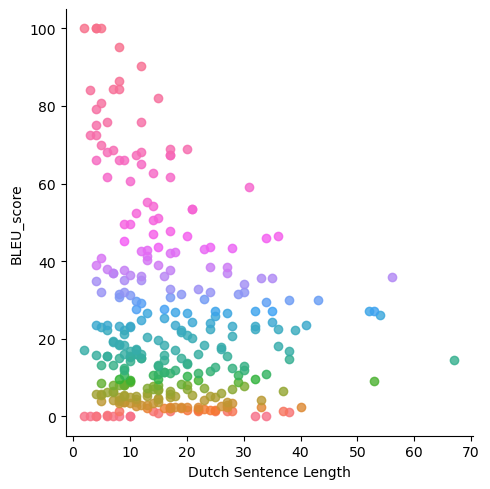

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
plot = sb.lmplot(corpus_df, x='Dutch Sentence Length' ,y="BLEU_score",hue='BLEU_score',legend = False, fit_reg=False)
plot.savefig('./BLEU_corpus.png')

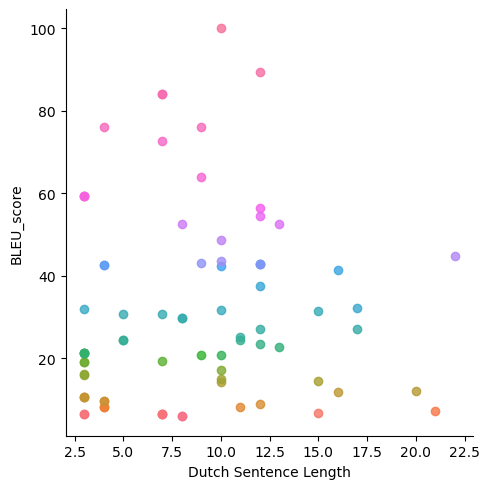

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
plot = sb.lmplot(synthetic_df, x='Dutch Sentence Length' ,y="BLEU_score",hue='BLEU_score',legend = False, fit_reg=False)
plot.savefig('./BLEU_synth.png')

In [17]:
corpus_df.nsmallest(n=20, columns = ['BLEU_score'])

,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation
62,Het kan een rechtopstaande tweevoeter geweest ...,,32,1,"It may have been a rectangular two-footer, whi...",0.000000e+00,"[\n {\n ""error type"": ""Accuracy"",\n ""er..."
90,Ze wilden niet dat het Amerikaanse volk een sl...,,34,1,They didn't want the American people to get a ...,0.000000e+00,"[\n {\n ""error type"": ""Accuracy"",\n ""er..."
197,Hoe gaan we nu verder? Wat gaan we nu doen?,"Si cette étape suscite une réaction positive, ...",10,16,What are we going to do now?,0.000000e+00,"{\n ""errors"": [\n {\n ""error_type"": ""..."
227,Let go of the past,", antwoordt hij.«Larguez le passé», répond-il.",6,6,Let go of the past,0.000000e+00,"{\n ""errors"": [\n {\n ""error_type"": ""..."
232,Ik wil met alles voeling houden en bijblijven,Je veux rester dans le coup,8,6,I wanted to meet everything voeling keep in bi...,0.000000e+00,"{\n ""errors"": [\n {\n ""error_type"": ""..."
272,Nest actief,club culinaire,3,3,The nest is active.,0.000000e+00,"{\n ""errors"": [\n {\n ""error_type"": ""..."
309,"Zonder een ei te breken, kan je geen omelet ba...",You have to get your hands dirty to achieve wh...,10,12,"Without breaking one, I can't bake an omelet.",0.000000e+00,"{\n ""errors"": [\n {\n ""error_type"": ""..."
212,And Action.,De vloekende verkopers klagen steen en been o...,2,72,And Action.,9.377719e-10,"{\n ""errors"": [\n {\n ""error_type"": ""..."
198,Michel Preudhomme :,"Allicht, maar voor de terugkeer van Igor De Ca...",4,48,Michel ⁇ Preudhomme:,1.026125e-04,"{\n ""errors"": [\n {\n ""error_type"": ""..."
183,Zo hebben we na de derde verjaardag,van het compartiment een portefeuille die is ...,7,59,So we have a third birthday.,9.638120e-04,"{\n ""errors"": [\n {\n ""error_type"": ""..."


In [19]:
worst_synth_df = synthetic_df.nsmallest(n=20, columns = ['BLEU_score'])

In [33]:
worst_synth_df


,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation
322,"Een appel die niet valt, wordt nooit geplukt",An apple that doesnt fall will never be picked,8,9,An appeal that is not picked is never picked.,5.934203,"{\n ""errors"": [\n {\n ""error_type"": ""..."
329,"Een appel die niet valt, wordt nooit geplukt",An apple that doesnt fall will never be picked,8,9,An appeal that is not picked is never picked.,5.934203,"{\n ""errors"": [\n {\n ""error_type"": ""..."
317,Een lege maag is een slechte raadgever,An empty stomach is not a good advisor,7,8,A foolish man is a bad consultant.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
324,Een lege maag is een slechte raadgever,An empty stomach is not a good advisor,7,8,A foolish man is a bad consultant.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
331,Een lege maag is een slechte raadgever,An empty stomach is not a good advisor,7,8,A foolish man is a bad consultant.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
360,Een klein jongetje,A small boy,3,3,A little boy is a little boy.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
369,Een klein stroompje,A small stream,3,3,A little bit of a straw.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
383,Kun je het raam even dichtdoen? Het is koud bu...,Can you close the window for a moment? Its col...,15,17,It's cold outside and there's wind blowing aro...,6.638159,"{\n ""errors"": [\n {\n ""error_type"": ""..."
391,"Bel hem eens op, hij zal nou wel thuis zijn en...","Call him once, hell probably be home by now an...",21,20,"Give him a call, he'll be home soon and I can ...",7.133515,"{\n ""errors"": [\n {\n ""error_type"": ""..."
320,Geld maakt niet gelukkig,Money cant buy happiness,4,4,Money doesn't make you happy.,8.116698,"{\n ""errors"": [\n {\n ""error_type"": ""..."


In [34]:
best_synth_df = synthetic_df.nlargest(n=20, columns = ['BLEU_score'])

In [35]:
best_synth_df

,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation
353,Zij heeft een kleinere broer die naar school g...,She has a younger brother who goes to school t...,10,10,She has a younger brother who goes to school t...,100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""..."
386,"Dat is niet waar hoor, ik heb het van iemand a...","Thats not true, I heard it from someone else.",12,9,"That's not true, I heard it from someone else.",89.315398,"{\n ""errors"": [\n {\n ""error_type"": ""..."
316,Geld is het root van alle kwaad,Money is the root of all evil,7,7,Money is the root of all evil.,84.089642,"{\n ""errors"": [\n {\n ""error_type"": ""..."
346,Geld is de wortel van alle kwaad,Money is the root of all evil,7,7,Money is the root of all evil.,84.089642,"{\n ""errors"": [\n {\n ""error_type"": ""..."
340,Een rat in de keuken is een slecht teken,A rat in the kitchen is a bad omen,9,9,A rat in the kitchen is a bad sign.,75.983569,"{\n ""errors"": [\n {\n ""error_type"": ""..."
347,"Hoe meer, hoe beter","The more, the better",4,4,"The more, the better.",75.983569,"{\n ""errors"": [\n {\n ""error_type"": ""..."
350,"Liefde is blind, maar gelukkig niet doof","Love is blind, but fortunately not deaf",7,7,"Love is blind, but fortunately not dumb.",72.597953,"{\n ""errors"": [\n {\n ""error_type"": ""..."
335,Een ezel hoort bij het paard dat hem voert,A donkey belongs to the horse that leads it,9,9,A donkey belongs to the horse that feeds him.,63.894310,"{\n ""errors"": [\n {\n ""error_type"": ""..."
362,Een kleine hond,A small dog,3,3,A small dog.,59.460356,"{\n ""errors"": [\n {\n ""error_type"": ""..."
367,Een klein meer,A small lake,3,3,A small lake.,59.460356,"{\n ""errors"": [\n {\n ""error_type"": ""..."
